In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
import pickle

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df=pd.read_csv(r"C:\Users\abhij\OneDrive\Desktop\New folder\Train_data.csv\Train_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
df.drop(columns=[ 'land', 'wrong_fragment', 'urgent', 'hot',
       'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_same_src_port_rate',
       'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'], axis = 1, inplace =  True)

In [16]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'num_failed_logins', 'is_host_login', 'is_guest_login',
       'count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class'],
      dtype='object')

In [19]:
num_col = [col for col in df.columns if df[col].dtypes in ('int64', 'float64')]
num_col


['duration',
 'src_bytes',
 'dst_bytes',
 'num_failed_logins',
 'is_host_login',
 'is_guest_login',
 'count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate']

In [20]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
cat_col

['protocol_type', 'service', 'flag', 'class']

In [21]:
for col in cat_col:
    print(df[col].value_counts())
    print('---'*20)

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64
------------------------------------------------------------
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64
------------------------------------------------------------
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64
------------------------------------------------------------
normal     13449
anomaly    11743
Name: class, dtype: int64
------------------------------------------------------------


In [23]:
df['protocol_type'].replace({'tcp':3,
                              'udp': 2,
                              'icmp': 1}, inplace=True)

In [24]:
df['flag'].replace({'SF': 11,
                     'S0': 10,
                     'REJ': 9,
                     'RSTR': 8,
                     'RSTO': 7,
                     'S1': 6,
                     'SH': 5,
                     'RSTOS0': 4,
                     'S2': 3,
                     'S3': 2,
                     'OTH':1} , inplace=True)

In [27]:
df['service'] = np.where(df['service'].map(df['service'].value_counts()) < 1000, 'Other', df['service'])

In [28]:
df['service'].value_counts()

Other       8173
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
Name: service, dtype: int64

In [29]:
df['service'].replace({'Other': 0,
                     'http': 5,
                     'private': 4,
                     'domain_u': 3,
                     'smtp': 2,
                     'ftp_data': 1} , inplace=True)

In [30]:
df['class'].replace({'normal': 1,
                      'anomaly':0 }, inplace=True)

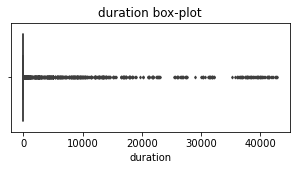

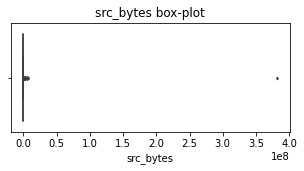

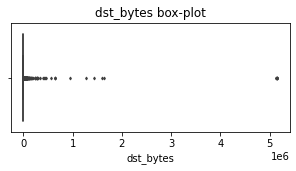

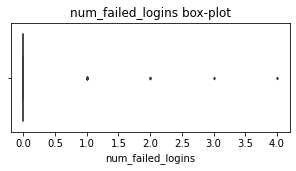

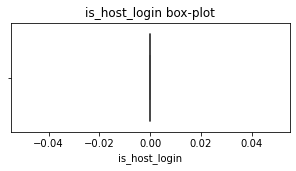

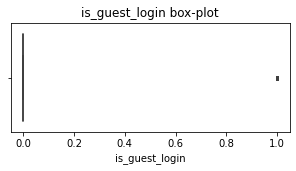

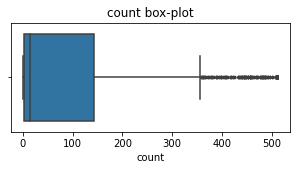

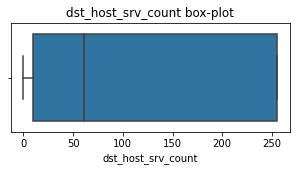

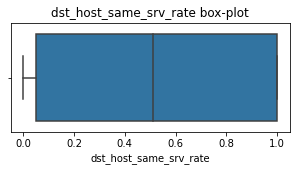

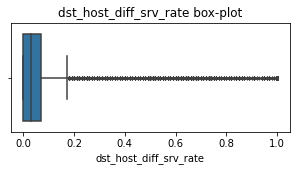

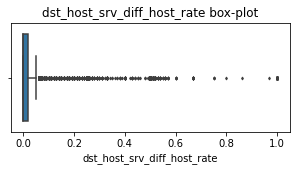

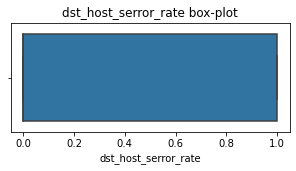

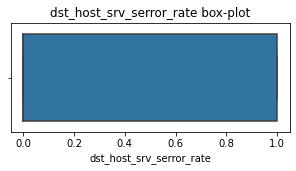

In [31]:
for col in num_col:
    plt.figure(figsize=(5,2))
    sns.boxplot(df[col], fliersize=2)
    plt.title(f'{col} box-plot')
    plt.show()

In [32]:
df['duration'] = np.where(df['duration'] > 0 , df['duration'].median(), df['duration'])

In [33]:
df['dst_bytes'] = np.where(df['dst_bytes'] > 0 , df['dst_bytes'].median(), df['dst_bytes'])

In [34]:
df['count'] = np.where(df['count'] > 0 , df['count'].median(), df['count'])

In [35]:
df1 = df.copy()

In [36]:
df1['class'].value_counts(normalize=True)

1    0.53386
0    0.46614
Name: class, dtype: float64

In [37]:
x = df1.drop('class', axis = 1)
y = df1['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 7,stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20153, 16), (5039, 16), (20153,), (5039,))

In [38]:
log_reg = LogisticRegression(random_state=7)
rf_clf = RandomForestClassifier(n_estimators=10,
                                criterion='gini',
                                max_depth=8,
                                min_samples_split=3,
                                min_samples_leaf=2,
                                n_jobs=-1,
                                random_state=7)
dt = DecisionTreeClassifier(
                                criterion='gini',
                                max_depth=8,
                                min_samples_split=3,
                                min_samples_leaf=2,
                                random_state=7)

In [40]:
def model_test(model, x, y):
    model.fit(x, y)
    y_pred = model.predict(x)
    print('F1 score', f1_score(y,y_pred))

In [41]:
model_test(log_reg, x_test,y_test)

F1 score 0.9110412428333641


In [42]:
model_test(rf_clf, x_test,y_test)

F1 score 0.9946226590024105


In [43]:
model_test(log_reg, x_train,y_train)

F1 score 0.6960657434968293


In [44]:
model_test(rf_clf, x_train,y_train)

F1 score 0.9942110869263188


In [45]:
model_test(dt, x_test,y_test)

F1 score 0.9929446713702191


In [46]:
model_test(dt, x_train,y_train)

F1 score 0.9934259259259259
